#Diabetes Prediction

TASK : 환자가 당뇨병을 가지고 있는지 분류(Classification)


## Q1. Task 에 따른 Train Data와 Target Data는 무엇이 되어야 할지 정의해보시오.

1. Train Data: Pregnancies, Glucose, Blood Pressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age column

2. Target Data: Outcome column

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("diabetes.csv")
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']
for i in col:
  data[i].replace(0,data[i].mean(),inplace=True)

## EDA(Exploratory Data Analysis)


## Q2. 데이터를 불러온 후에 개요를 살펴보기 위해 다음 메소드를 사용합니다. 각 메소드를 사용해보고 어떤 정보를 알 수 있는지 정리해보세요.

In [ ]:
data.head()
# data 각 column 별 상위 5개 행 출력

data.info()
# data의 구조, 행 수, column 별 데이터 종류 및 결측치 개수 출력

data.describe()
# data 각 column 결측치가 아닌 행 개수, 평균, 표준편차, 최소/최대값, 백분위수, 출력

data.shape
# data의 행, 열 수 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


(768, 9)

## Q3. 모든 ML패키지가 결측치를 자동으로 처리하지 않습니다. 결측치 존재 여부를 확인해보세요. 결측치가 존재한다면, 이를 처리하는 방법에 대해 알아보고 처리해보세요. 해당 과제에서 결측치를 처리한 방법이 올바른 방법인지 검토해보세요.


In [ ]:
# 결측치 존재 여부 확인: 존재하지 않음
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Q4. 결측치가 존재하는 경우, 다양한 보간법에 대하여 정리하고, 그에 대한 코드를 작성해보세요.

In [ ]:
# 1) 평균값으로 대체
# data.fillna(data.mean(), inplace=True)

# 2) 중위값으로 대체
# data.fillna(data.median(), inplace=True)

# 3) 최빈값으로 대체
# data.fillna(data.mode(), inplace=True)

# 4) 기타 특정값으로 대체
# data.fillna(특정값, inplace=True)

## Data Visualization


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

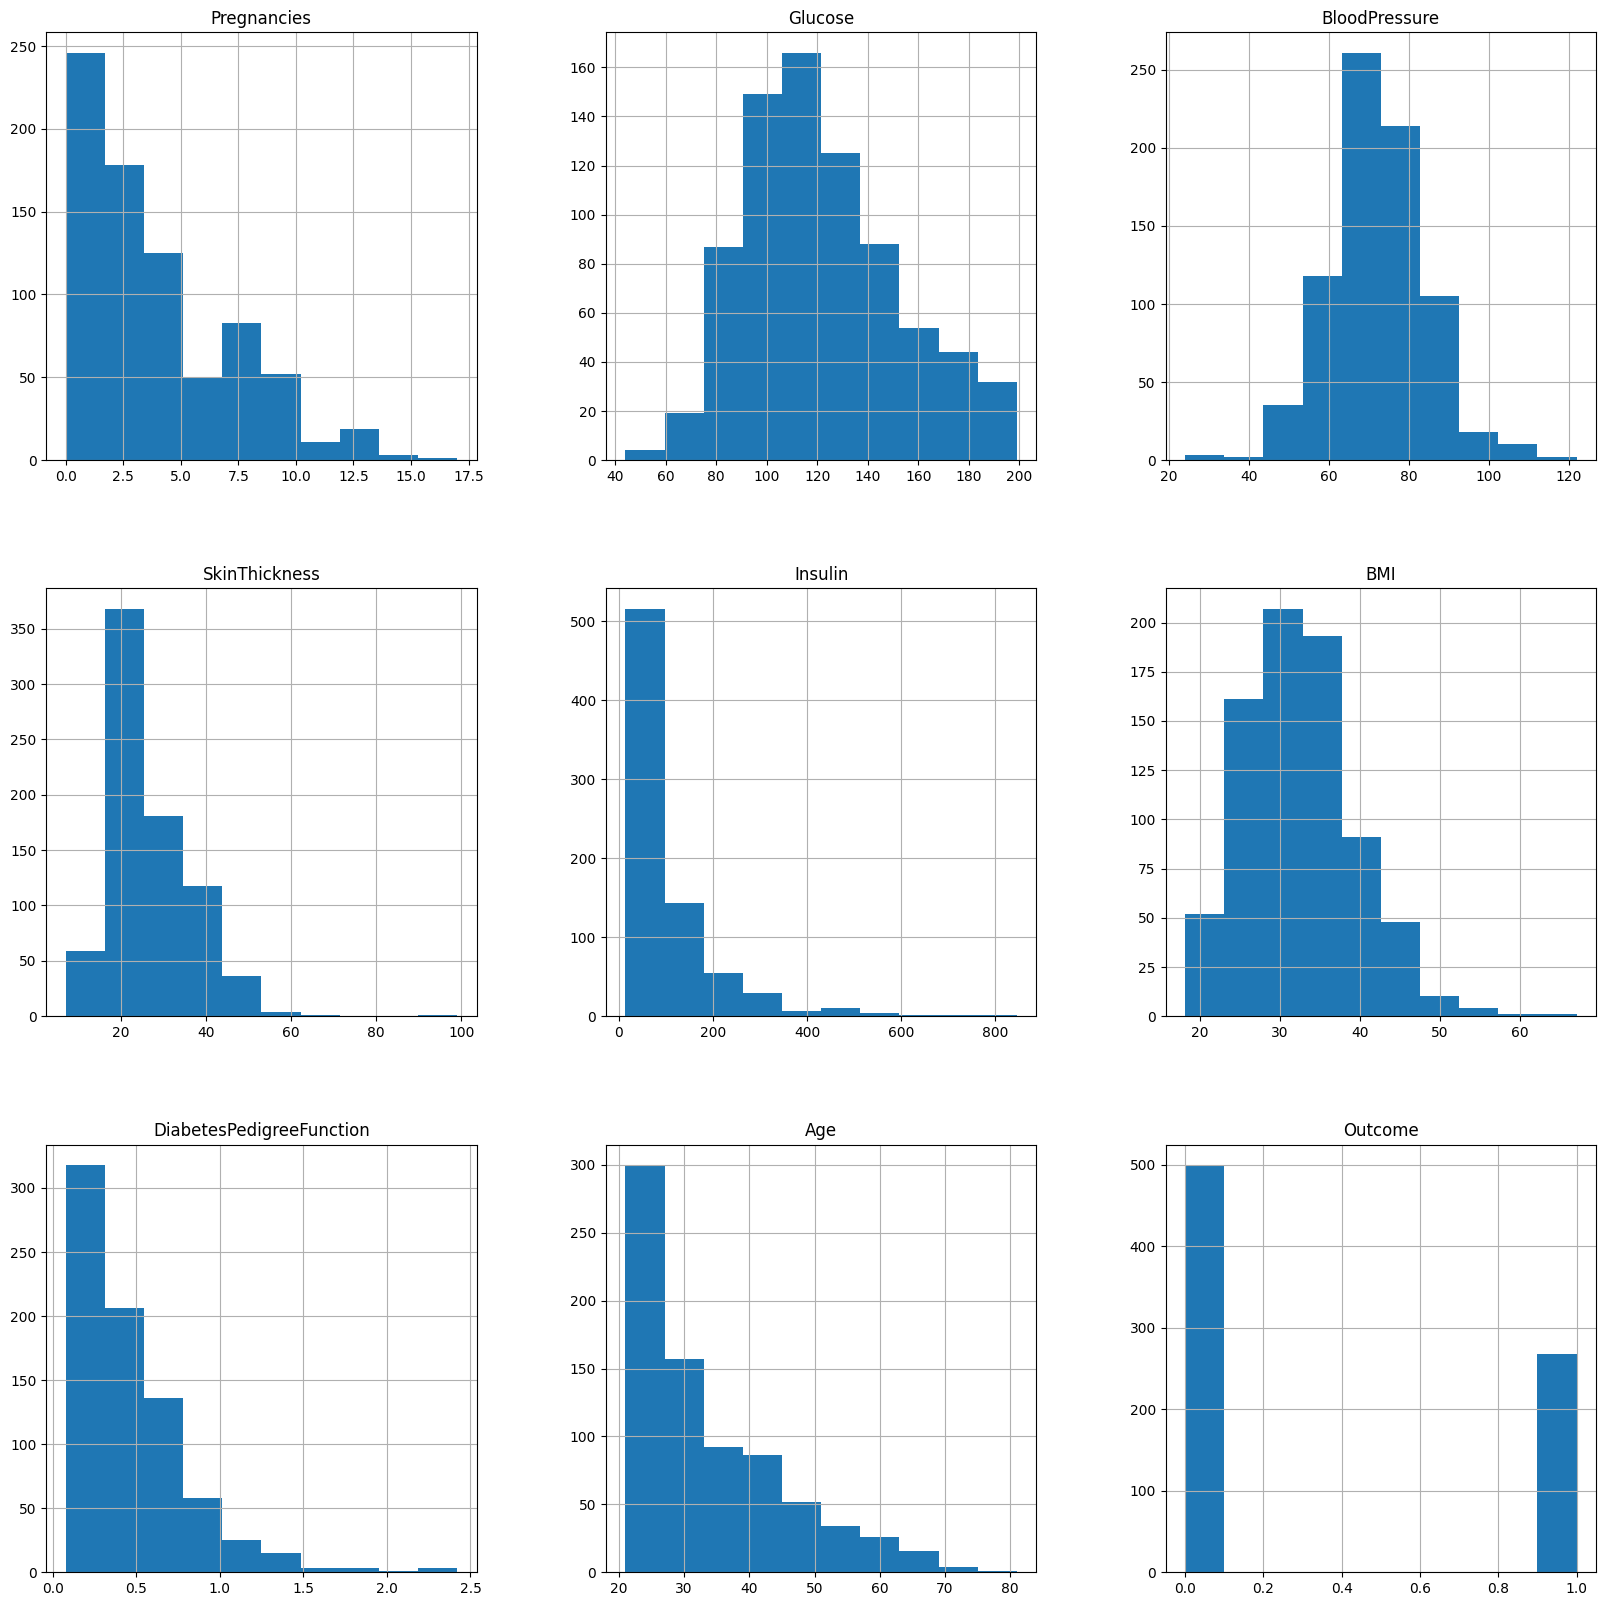

In [ ]:
data.hist(figsize = (20,20))

## Q5. correlation plot을 그리고, 해당 plot에서 얻은 인사이트를 정리해보세요.

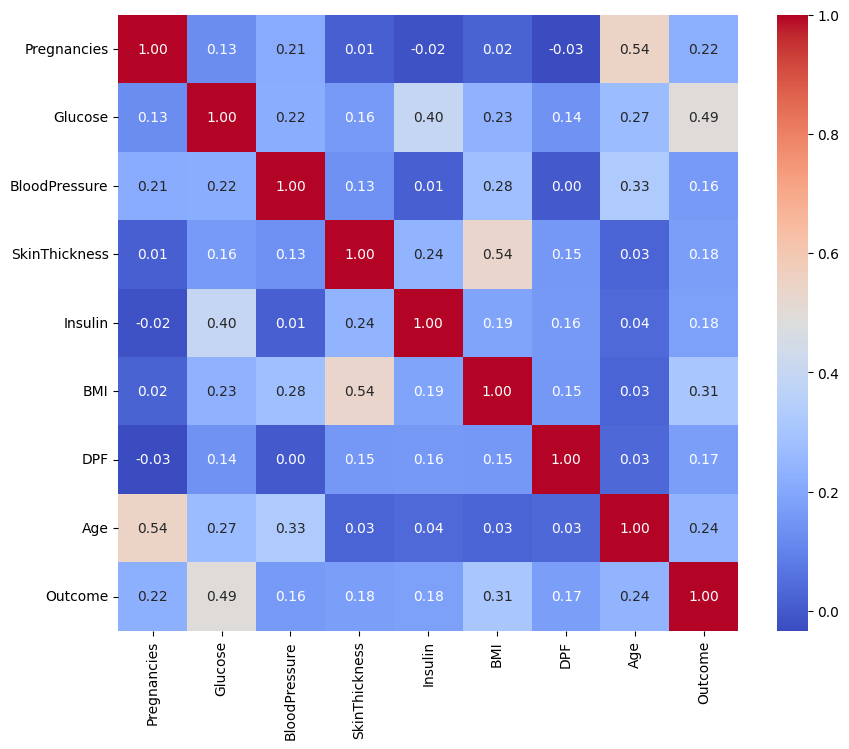

In [ ]:
import seaborn as sns
# 변수명이 너무 길어 짧게 변경
data.rename(columns={'DiabetesPedigreeFunction': 'DPF'}, inplace=True)

# correlation matrix 출력
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

인사이트:   
1) 각 column 별 타겟 변수와 상관성 확인  
Glucose(0.49), BMI(0.31), Age(0.24), Pregnancies(0.22), Skin Thikness(0.18), Insulin(0.18), DPF(0.17), Blood Pressure(0.16)

2) 다중공산성 확인  
Blood Pressure, BMI, Glucose 변수가 상당히 높은 VIF 값을 가짐.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 독립변수들의 데이터프레임 생성
X = data.drop('Outcome', axis=1)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 결과 출력
print(vif_data)


        Variable        VIF
0    Pregnancies   3.274890
1        Glucose  21.351046
2  BloodPressure  31.910800
3  SkinThickness  12.518597
4        Insulin   3.307851
5            BMI  32.797700
6            DPF   3.182662
7            Age  14.249252


<Axes: xlabel='Outcome', ylabel='Age'>

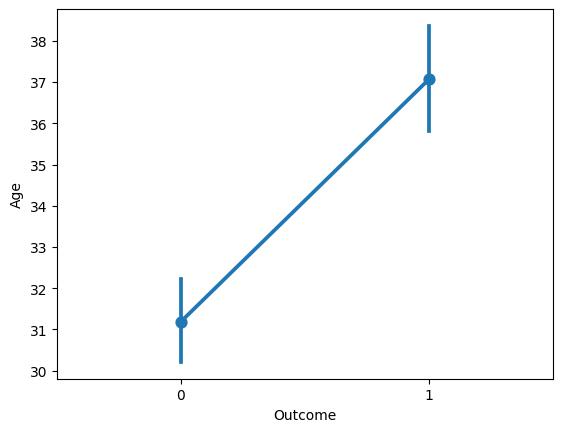

In [ ]:
# Outcome"이 0인 그룹과 1인 그룹 간의 "Age" 평균을 시각적으로 비교
sns.pointplot(x = "Outcome", y = "Age", data = data)

<Axes: >

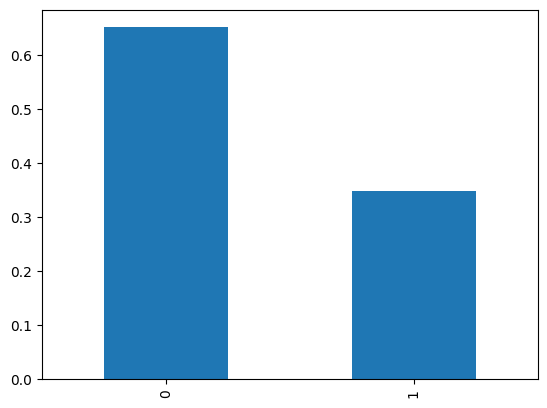

In [ ]:
# Class imbalance 확인
data.Outcome.value_counts(normalize=True).plot(kind = "bar")

<Axes: xlabel='Age', ylabel='Insulin'>

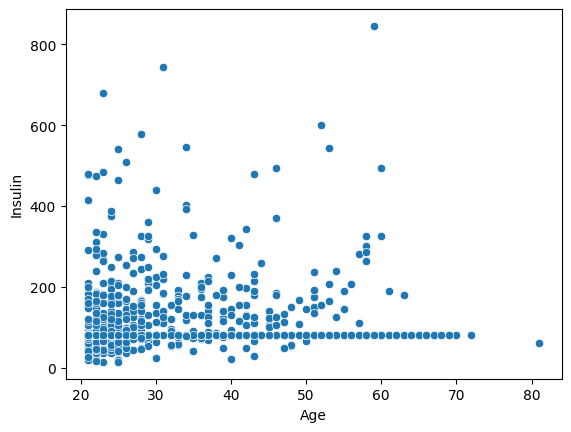

In [ ]:
# Age와 Insulin 변수 분포 확인
sns.scatterplot(x = "Age", y = "Insulin", data = data)

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

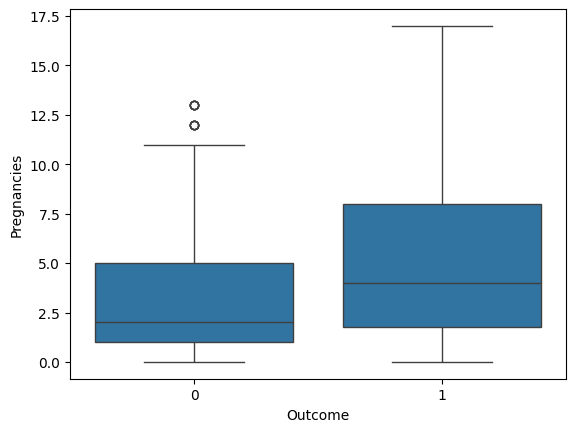

In [ ]:
#  Outcome이 0인 그룹과 1인 그룹 간의 Pregnancies 분포를 시각적으로 비교
sns.boxplot(x = "Outcome", y = "Pregnancies", data = data)

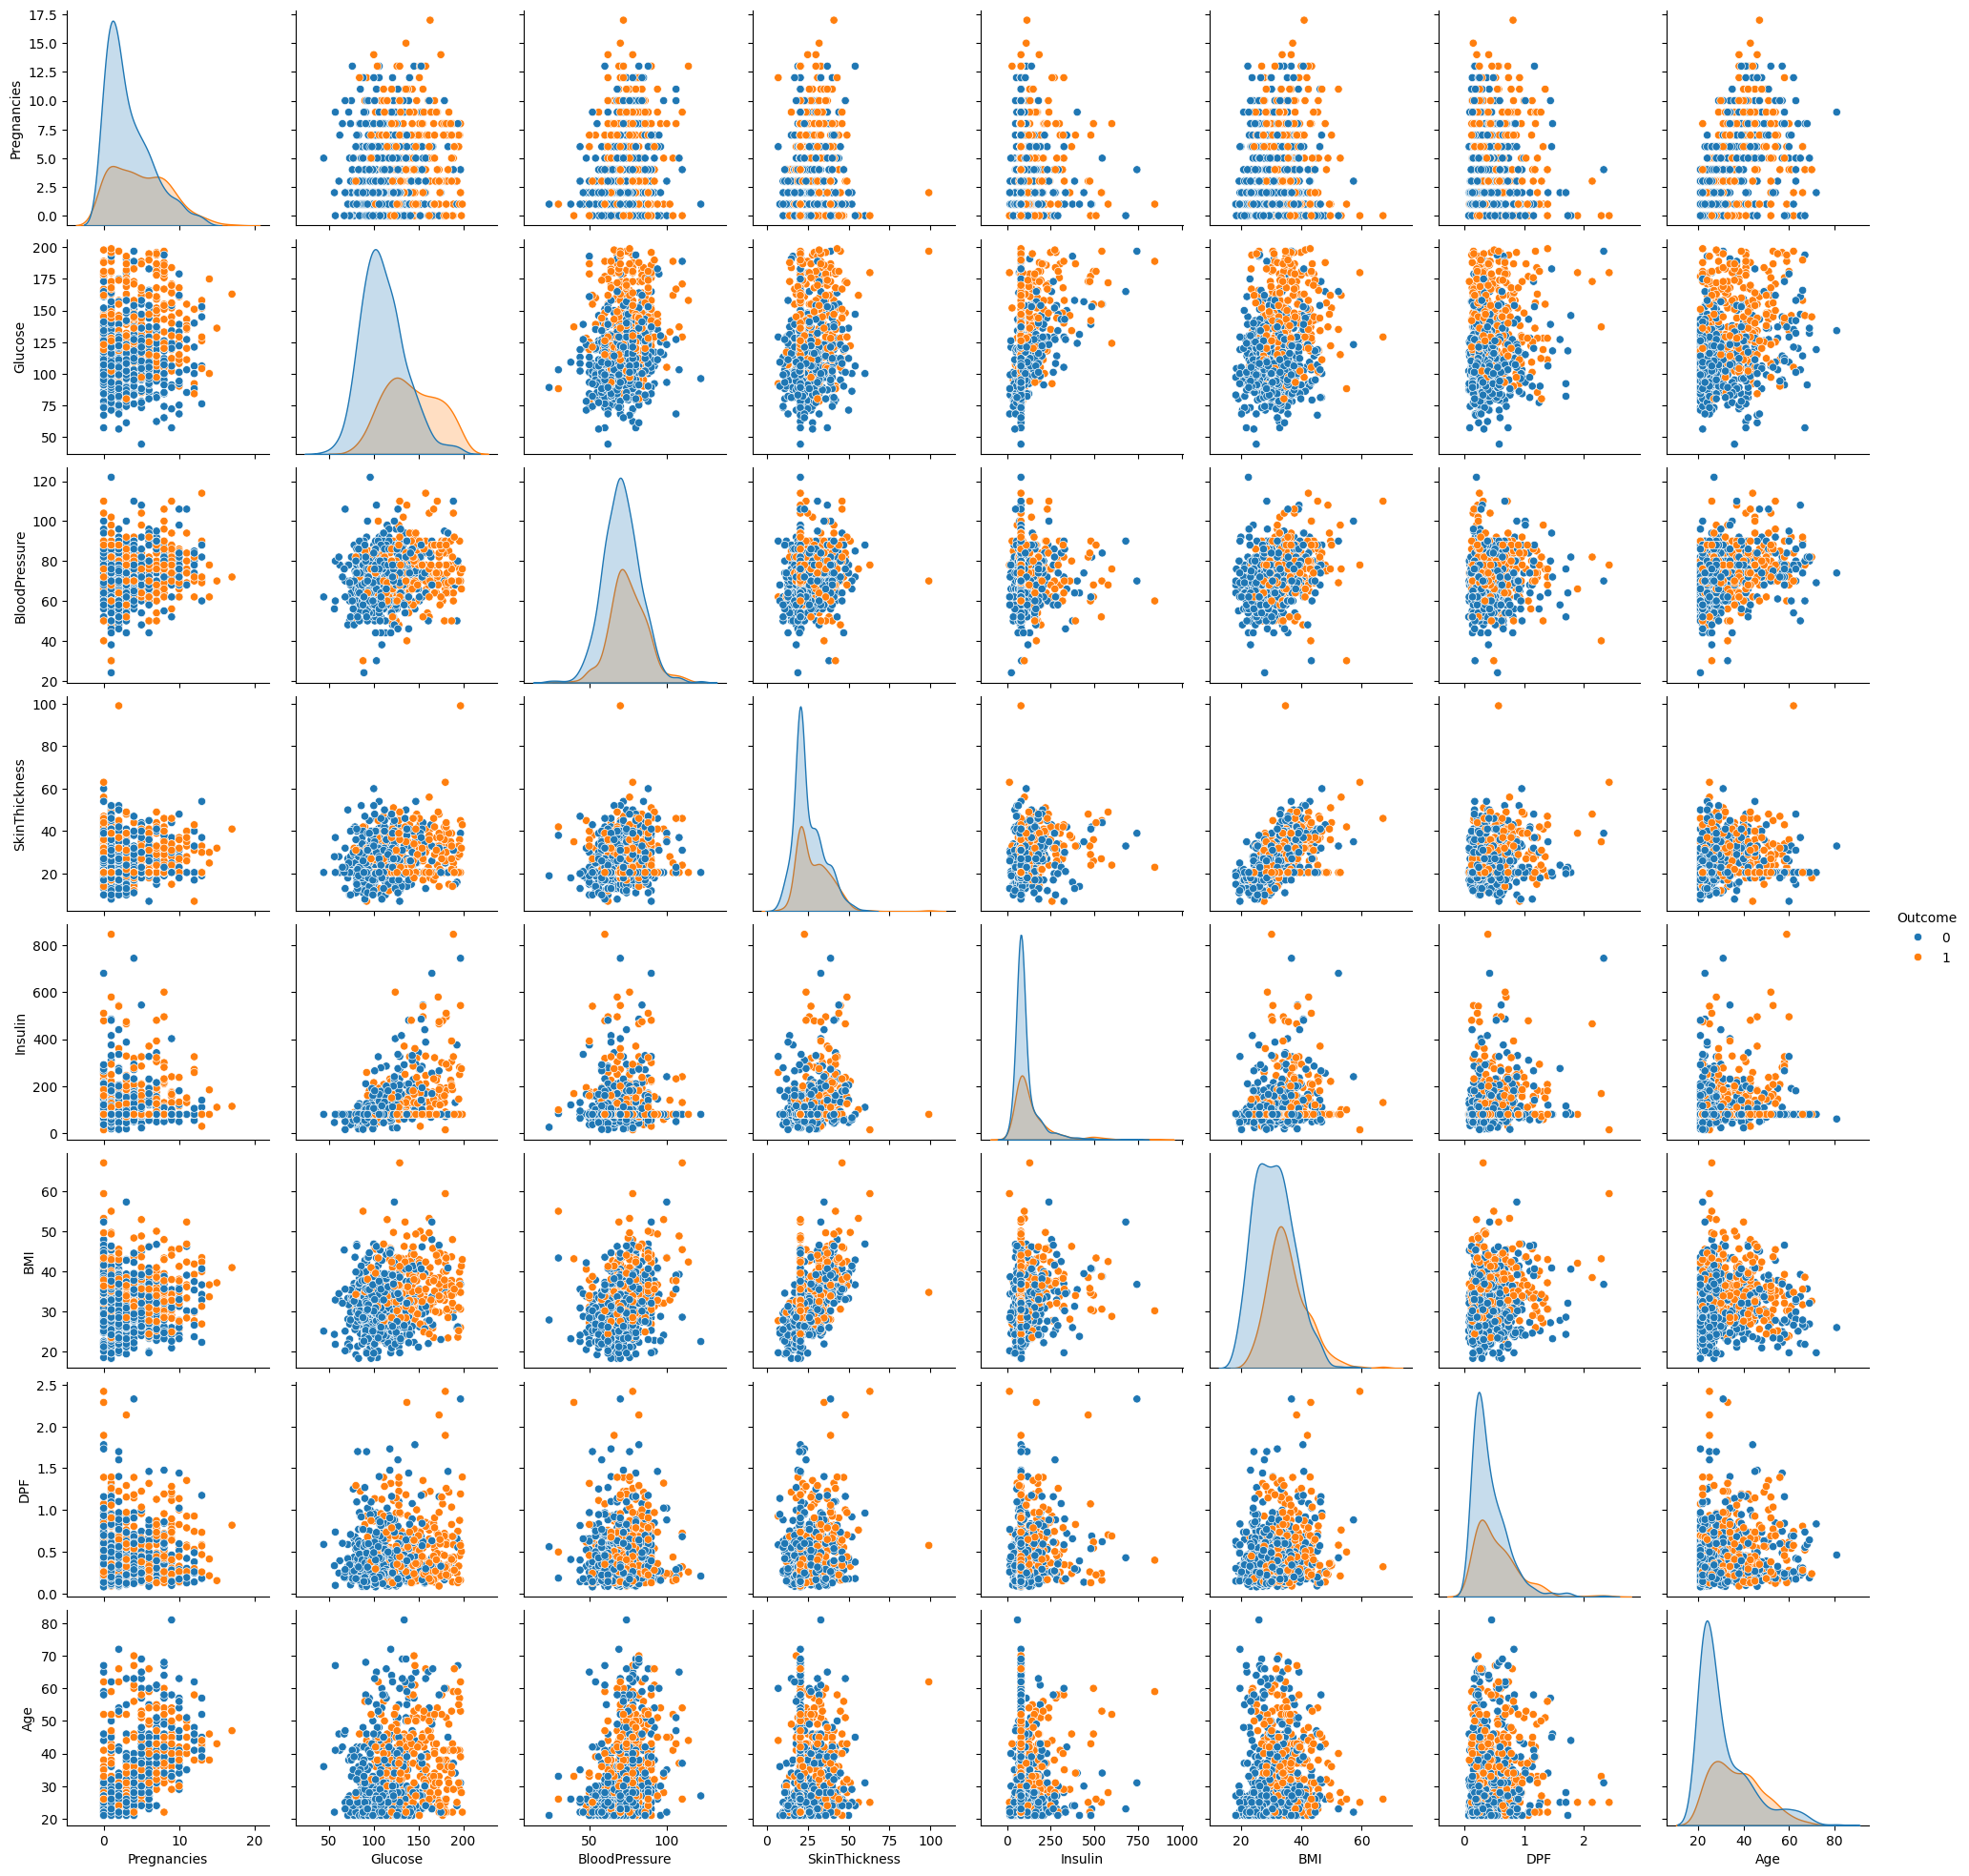

In [ ]:
# 변수 산점도 행렬 출력
sns.pairplot(data, hue = "Outcome")

<Axes: xlabel='Pregnancies', ylabel='Age'>

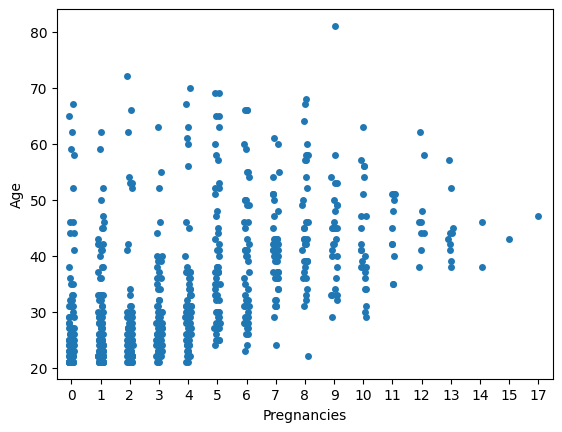

In [ ]:
sns.stripplot(x = "Pregnancies", y = "Age", data = data)

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

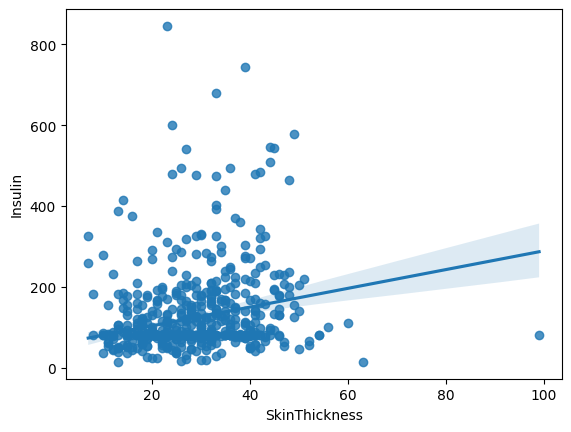

In [ ]:
sns.regplot(x = "SkinThickness", y = "Insulin", data = data)

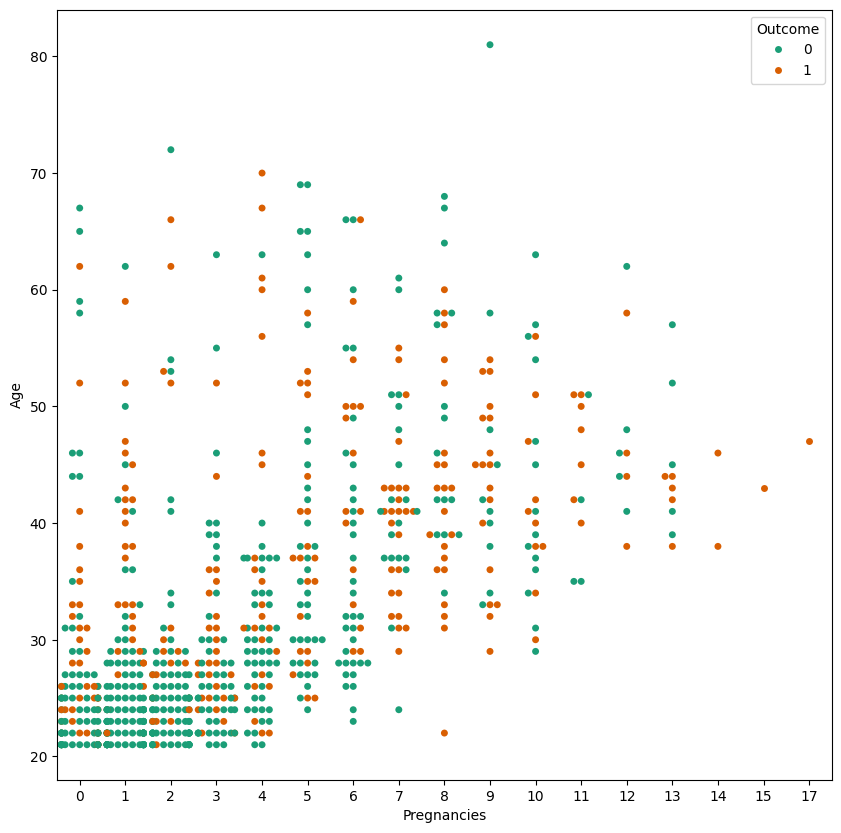

In [ ]:
f, ax = plt.subplots(figsize = (10, 10))
ax = sns.swarmplot(x = "Pregnancies", y = "Age", hue = "Outcome",
                   palette = "Dark2", data = data)
ax = sns.set(style = "darkgrid")

## Q6. 위에서 보여준 그래프들(혹은 본인이 그려본 그래프)로부터 한 그래프를 선정하여, 해당 그래프에서 어떤 정보를 얻을수 있는지 작성하세요.

In [ ]:
# "Outcome"이 1인 데이터의 "Pregnancies" 변수의 평균, 25%, 50%, 75% 계산
summary_outcome_1 = data[data['Outcome'] == 1]['Pregnancies'].describe(percentiles=[.25, .5, .75])

print("Outcome이 1인 데이터의 Pregnancies 변수 요약 통계:")
print(summary_outcome_1)

Outcome이 1인 데이터의 Pregnancies 변수 요약 통계:
count    268.000000
mean       4.865672
std        3.741239
min        0.000000
25%        1.750000
50%        4.000000
75%        8.000000
max       17.000000
Name: Pregnancies, dtype: float64


In [ ]:
# "Outcome"이 0인 데이터의 "Pregnancies" 변수의 평균, 25%, 50%, 75% 계산
summary_outcome_0 = data[data['Outcome'] == 0]['Pregnancies'].describe(percentiles=[.25, .5, .75])

print("Outcome이 0인 데이터의 Pregnancies 변수 요약 통계:")
print(summary_outcome_0)

Outcome이 0인 데이터의 Pregnancies 변수 요약 통계:
count    500.000000
mean       3.298000
std        3.017185
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       13.000000
Name: Pregnancies, dtype: float64


임신 횟수와 당뇨병 발병 간의 boxplot을 통해 당뇨병 환자의 경우 상대적으로 임신 횟수의 평균 및 백분위값(25%, 50%, 75%)가 높게 나타남을 확인할 수 있었다. 이를 통해 임신 횟수와 당뇨병 발병 간의 양의 상관관계가 있음을 추론할 수 있다.

## 이상치 처리


<Axes: >

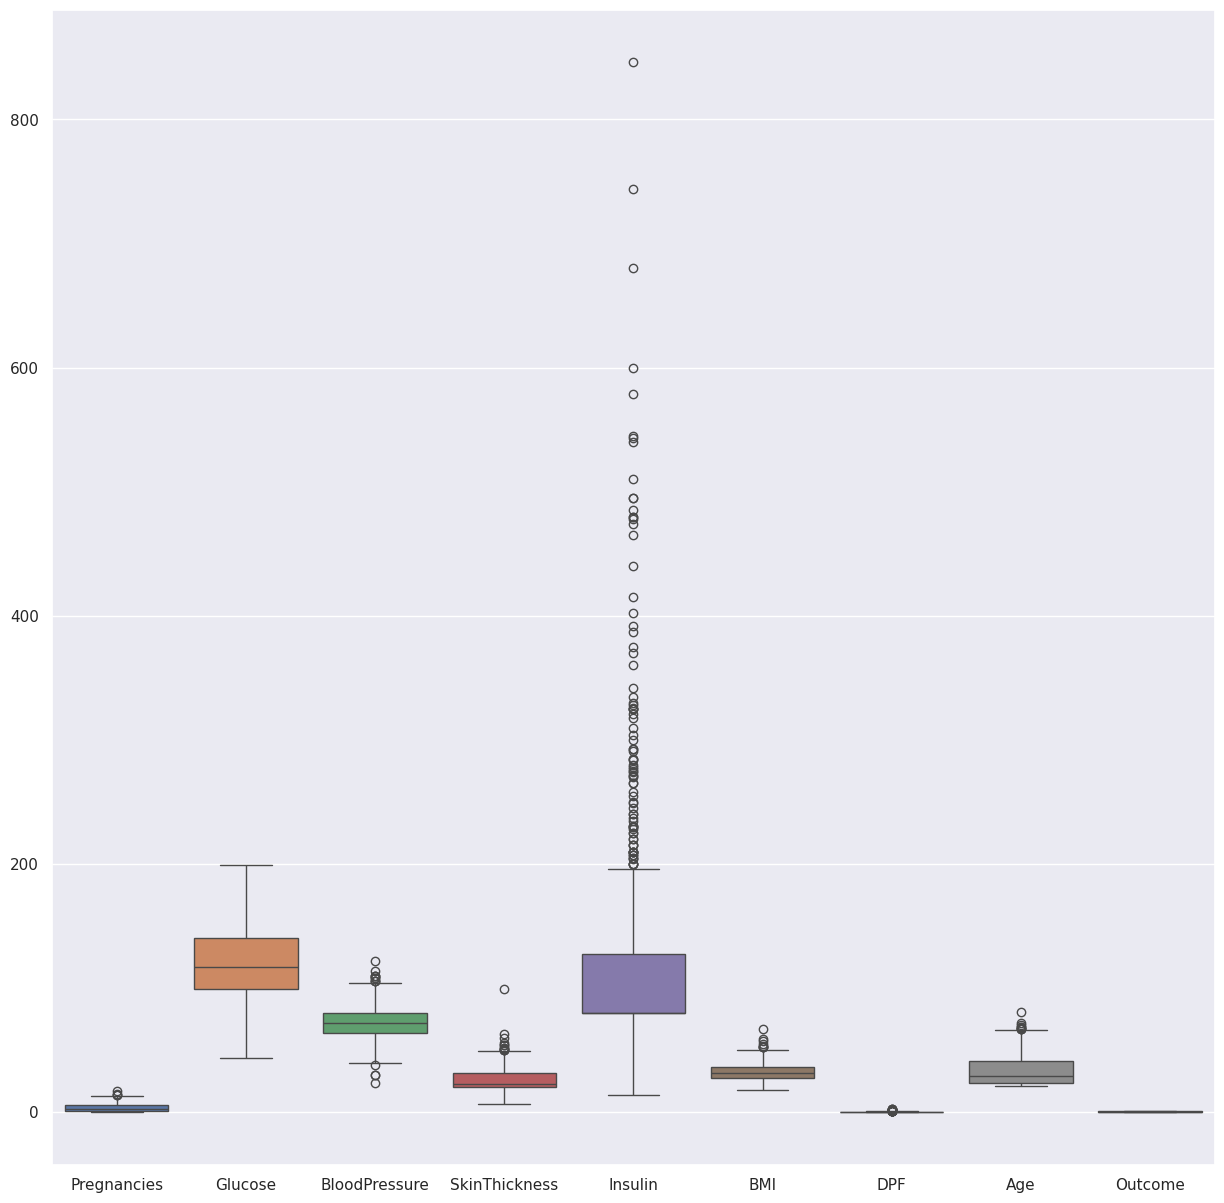

In [ ]:
plt.figure(figsize = (15,15))
sns.boxplot(data = data)

`Insulin`에 대하여 심각한 이상치가 존재함을 알 수 있음


<Axes: >

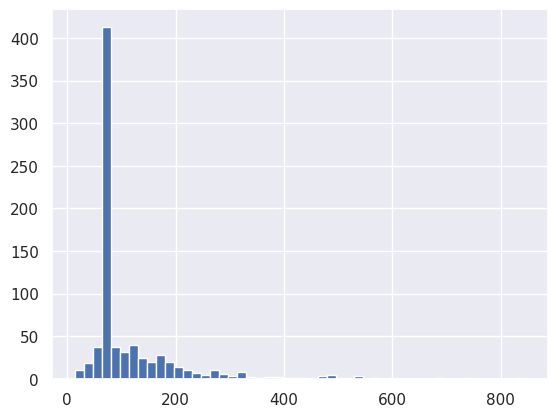

In [ ]:
data["Insulin"].hist(bins = 50)

<Axes: >

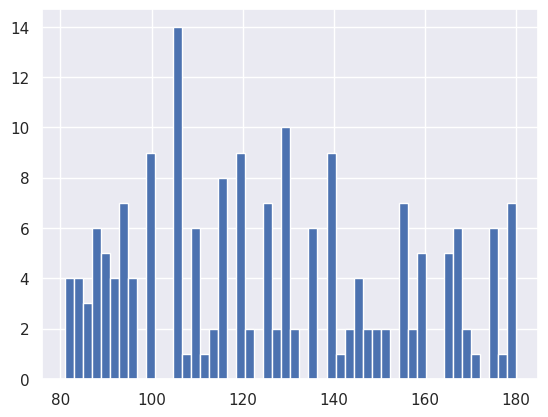

In [ ]:
q90 = data["Insulin"].quantile(0.9)
q10 = data["Insulin"].quantile(0.1)

data = data[(data["Insulin"] < q90) & (data["Insulin"] > q10)]
data["Insulin"].hist(bins = 50)

## 정규화, 표준화


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# "Outcome" 열을 제외한 모든 열을 사용하여 표준화 모델을 학습
scaler.fit(data.drop(columns = ["Outcome"], axis = 1))

# "Outcome"을 제외한 모든 특성을 표준화하고, 결과를 scaled_X에 저장
scaled_X = scaler.transform(data.drop(columns = ["Outcome"]))

In [ ]:
X = pd.DataFrame(scaled_X, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.709198,-1.376728,-0.275129,-0.607068,-1.115915,-0.731352,-1.021165,-1.046487
1,-0.999324,0.558036,-2.312475,0.612715,1.439792,1.500415,5.281849,0.228421
2,-0.128945,-1.820111,-1.528880,0.307769,-1.323135,-0.299877,-0.780456,-0.515275
3,0.451308,1.726956,0.195028,-1.013663,1.681548,-1.073556,0.226957,2.140782
4,-0.709198,-0.812422,-3.096070,0.917661,-1.495818,1.530172,-0.973617,0.228421


In [ ]:
y = data.Outcome

## Train / Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Model Selction


## Q7. Classification model의 종류에 대해 검색해보고, 각각의 특징(장단점) 가볍게 정리해보기. 그 중 한개의 모델에 대해 각각의 특징(장단점)에 대하여 왜 이러한 장단점이 있는지 공부해보기


1) 랜덤 포레스트 (Random Forest):

- 장점:

  - 과적합을 줄이고 안정적인 성능을 제공한다.
    - 이유: 여러 결정 트리를 조합하여 앙상블 학습을 구성하므로 과적합의 영향을 줄일 수 있다. 다수의 결정 트리를 사용하면 개별 트리의 단점을 상쇄하면서 모델이 더 안정적으로 일반화될 수 있다.
  - 특성 중요도를 제공해 특성 선택에 도움을 준다
    - 이유: 각 트리에서 특성 중요도를 계산하고, 이를 통합하여 전체 모델의 특성 중요도를 얻을 수 있다. 이를 통해 어떤 특성이 예측에 가장 중요한 역할을 하는지 파악할 수 있어, 특성 선택에 도움이 된다.

- 단점:
  - 모델 구조를 이해하기 어렵다.
   - 이유: 랜덤 포레스트는 여러 개의 결정 트리가 조합된 모델이므로 개별 트리의 구조를 이해하기 어렵다. 이는 모델의 해석성을 제한할 수 있다.
  - 훈련 시간이 길다.
   - 이유: 다수의 결정 트리를 훈련하고 조합하는 데 시간이 오래 걸릴 수 있다. 특히 트리의 개수와 깊이를 높일수록 훈련 시간이 증가할 수 있다.
  - 메모리 사용량이 많을 수 있다.
    - 이유: 각 트리는 상당한 양의 메모리를 사용하므로, 많은 트리를 사용할 경우 메모리 사용량이 증가할 수 있다.

2) 서포트 벡터 머신 (Support Vector Machine, SVM):

- 장점:

  - 이상치에 덜 영향을 받는다.
  - 분류 성능이 높다.
  - 일반화 성능이 높다.
  - 다양한 커널 함수 사용 가능하다.
  - 작은 데이터셋에서도 잘 동작한다.


- 단점:
  - 대규모 데이터셋에 대한 학습이 느릴 수 있다.
  - 모델 해석이 어렵다.
  - 파라미터 튜닝의 어렵다.

3) K-최근접 이웃 (K-Nearest Neighbors, KNN):

- 장점:

  - 간단하고 이해하기 쉽다.
  - 훈련 단계가 빠르다.

- 단점:

  - 예측 시 계산 비용이 크다.
  - 특성이 많거나 데이터셋이 큰 경우 성능이 저하될 수 있다.


## Q8. 위에서 선택한 한개의 모델(Logistic 제외)에 대하여 Train 진행해보기

In [ ]:
# Random Forest Classification으로 진행

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.4f}')

# Confusion matrix
print("Confusion matrix:\n", classification_report(y_test, y_pred))


accuracy: 0.7500
Confusion matrix:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.71      0.67      0.69        15

    accuracy                           0.75        36
   macro avg       0.74      0.74      0.74        36
weighted avg       0.75      0.75      0.75        36



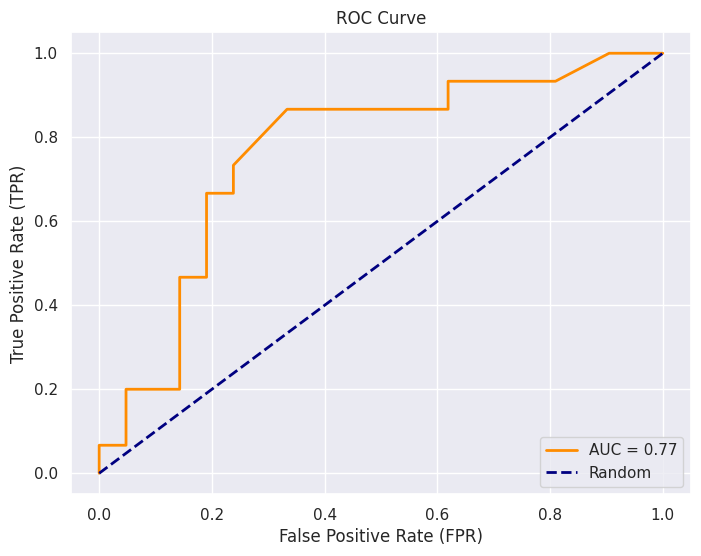

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

y_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC Curve 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
